In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv('eda_data.csv')

In [3]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'hourly', 'employer_provided', 'min_salary', 'max_salary', 'avg_salary',
       'company_txt', 'job_state', 'same_state', 'age', 'python_yn', 'R_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'job_simp', 'seniority', 'desc_len',
       'num_comp'],
      dtype='object')

In [4]:
# choose relevant columns
df_model = df[['avg_salary','Rating','Size','Type of ownership','Industry', 'Sector','Revenue','num_comp','hourly','employer_provided','job_state','same_state', 'age', 'python_yn',
       'spark_yn', 'aws_yn', 'excel_yn', 'job_simp','seniority', 'desc_len']]

In [5]:
# dumy data
df_dum = pd.get_dummies(df_model)

In [6]:
df_dum.head()

,avg_salary,Rating,num_comp,hourly,employer_provided,same_state,age,python_yn,spark_yn,aws_yn,...,job_simp_analyst,job_simp_data engineer,job_simp_data scientist,job_simp_director,job_simp_manager,job_simp_mle,job_simp_na,seniority_jr,seniority_na,seniority_senior
0,72.0,3.8,0,0,0,0,49,1,0,0,...,0,0,1,0,0,0,0,0,1,0
1,87.5,3.4,0,0,0,0,38,1,0,0,...,0,0,1,0,0,0,0,0,1,0
2,85.0,4.8,0,0,0,1,12,1,1,0,...,0,0,1,0,0,0,0,0,1,0
3,76.5,3.8,3,0,0,1,57,1,0,0,...,0,0,1,0,0,0,0,0,1,0
4,114.5,2.9,3,0,0,1,24,1,0,0,...,0,0,1,0,0,0,0,0,1,0


In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X = df_dum.drop('avg_salary', axis=1)
y = df_dum.avg_salary.values

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
import statsmodels.api as sm

In [11]:
X_sm = X = sm.add_constant(X)

In [12]:
model = sm.OLS(y,X_sm)
model.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.708
Model:                            OLS   Adj. R-squared:                  0.638
Method:                 Least Squares   F-statistic:                     10.21
Date:                Mon, 26 Dec 2022   Prob (F-statistic):           1.48e-94
Time:                        19:48:36   Log-Likelihood:                -3311.7
No. Observations:                 742   AIC:                             6909.
Df Residuals:                     599   BIC:                             7568.
Df Model:                         142                                         
Covariance Type:            nonrobust                                         
=====================================================================================================================
                                                        coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------------------------
const                                                43.6076      6.719      6.490      0.000      30.411      56.804
Rating                                                3.6057      1.937      1.861      0.063      -0.199       7.411
num_comp                                              2.2508      0.868      2.593      0.010       0.546       3.956
hourly                                              -36.5762      9.173     -3.987      0.000     -54.591     -18.561
employer_provided                                    31.3671     11.524      2.722      0.007       8.734      54.000
same_state                                            2.4830      2.619      0.948      0.343      -2.660       7.626
age                                                   0.0349      0.030      1.164      0.245      -0.024       0.094
python_yn                                             8.1367      2.523      3.224      0.001       3.181      13.093
spark_yn                                             -0.5713      2.921     -0.196      0.845      -6.307       5.164
aws_yn                                                1.1225      2.736      0.410      0.682      -4.251       6.495
excel_yn                                             -0.4029      2.268     -0.178      0.859      -4.856       4.051
desc_len                                             -0.0001      0.001     -0.171      0.864      -0.002       0.001
Size_-1                                              13.6169      8.629      1.578      0.115      -3.331      30.564
Size_1 to 50 employees                                1.1080      6.501      0.170      0.865     -11.659      13.875
Size_10000+ employees                                -2.8973      5.800     -0.500      0.618     -14.289       8.494
Size_1001 to 5000 employees                           6.1265      3.879      1.579      0.115      -1.492      13.745
Size_201 to 500 employees                             2.2468      3.873      0.580      0.562      -5.360       9.853
Size_5001 to 10000 employees                         -3.8778      5.442     -0.713      0.476     -14.566       6.810
Size_501 to 1000 employees                            2.1683      4.059      0.534      0.593      -5.804      10.140
Size_51 to 200 employees                              4.1877      4.422      0.947      0.344      -4.496      12.872
Size_Unknown                                         20.9284     13.993      1.496      0.135      -6.552      48.409
Type of ownership_-1                                 13.6169      8.629      1.578      0.115      -3.331      30.564
Type of ownership_College / University                6.4566     17.737      0.364      0.716     -28.378      41.292
Type of ownersh

In [13]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

In [14]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [15]:
# shows how far we are off, if its -21, it could mean 21000usd
np.mean(cross_val_score(lm,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-20.769116207766107

In [16]:
# we are talking about how sparse that matrix is, 
# for a multiple linear regression is hard to get good values from that because there is such limited data.
# a different regresson model lasso normalises that data and it should be better for our model


In [17]:
# lasso regression

In [18]:
lm_l = Lasso(alpha=.13)
lm_l.fit(X_train,y_train)
np.mean(cross_val_score(lm_l,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-19.260954991440297

In [19]:
alpha = []
error = []

In [20]:
for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100))
    error.append(np.mean(cross_val_score(lml,X_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))

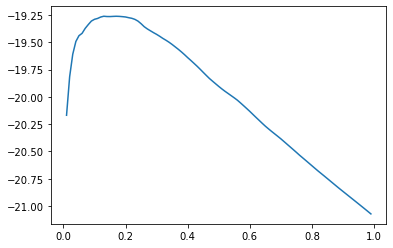

In [21]:
plt.plot(alpha,error)

In [22]:
err = tuple(zip(alpha,error))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
12,0.13,-19.260955


In [23]:
# we would expect a random forest to perform better,
# because its a tree based decision process and there is alot of 1's and 0's data

In [24]:
from sklearn.ensemble import RandomForestRegressor

In [25]:
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,X_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-14.69494488027483

In [26]:
# tune models GridsearchCV 

In [27]:
# we are using GridsearchCV to tune this, what grid search does is you put in all the parameters you want,
# it runs all the models and speeds up the one with the best result.

In [28]:
from sklearn.model_selection import GridSearchCV

In [32]:
parameters = {'n_estimators':range(10,300,10), 'criterion':('squared_error','absolute_error'), 'max_features':('sqrt','log2')}

In [33]:
# there is a couple of approaches, a nornal gridserach or a randomised gridserach, a normal gridserve goes through 
# all the exhaustive scenarios while a random gridserach is not exhaustive, its for when you dont have enough time

In [34]:
gs = GridSearchCV(rf,parameters,scoring='neg_mean_absolute_error',cv=3)


In [35]:
 gs.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('squared_error', 'absolute_error'),
                         'max_features': ('sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

In [36]:
gs.best_score_

-15.232077597036353

In [37]:
gs.best_estimator_

RandomForestRegressor(max_features='sqrt', n_estimators=80)